In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
import os
import networkx as nx
from collections import Counter, defaultdict
import EoN
import tqdm

# define path to the project for convenoent relative import
sys.path.append(os.path.dirname(os.getcwd())) 
from source.model_output import SEIRModelOutput, SEIRParams
from source.SEIR_network import SEIRNetworkModel


### Dataset with simple curves

In [41]:
tmax = 150 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 'init_inf_frac', 'alpha']+ \
    [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

In [42]:
network_model = SEIRNetworkModel(10**5)

beta = 0.5 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected

alpha_arr = np.arange(0.2, 1, 0.01) # fraction of initial non-immune array
beta_arr = np.arange(0.1, 1, 0.01) # transmission rate array

print('Dataset size:', len(alpha_arr)*len(beta_arr))

for beta in tqdm.tqdm(beta_arr):
    for alpha in alpha_arr:
        res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=(1-alpha))
        sample = [beta, gamma, delta, init_inf_frac, alpha] + res.daily_incidence
        dataset.loc[len(dataset)] = sample

Dataset size: 7200


100%|██████████| 90/90 [6:47:50<00:00, 271.89s/it]  


In [43]:
dataset.to_csv('../data/network_model_dataset_7200.csv')

In [44]:
dataset

,beta,gamma,delta,init_inf_frac,alpha,0,1,2,3,4,...,140,141,142,143,144,145,146,147,148,149
0,0.10,0.3,0.2,0.0001,0.20,0.0,7.0,17.0,31.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.10,0.3,0.2,0.0001,0.21,0.0,10.0,17.0,36.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.10,0.3,0.2,0.0001,0.22,0.0,12.0,18.0,20.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.10,0.3,0.2,0.0001,0.23,0.0,9.0,24.0,28.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.10,0.3,0.2,0.0001,0.24,0.0,8.0,8.0,9.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.99,0.3,0.2,0.0001,0.95,0.0,580.0,1503.0,3027.0,5325.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7196,0.99,0.3,0.2,0.0001,0.96,0.0,562.0,1531.0,3261.0,6013.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7197,0.99,0.3,0.2,0.0001,0.97,0.0,560.0,1519.0,3304.0,6409.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7198,0.99,0.3,0.2,0.0001,0.98,0.0,628.0,2021.0,4631.0,8496.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


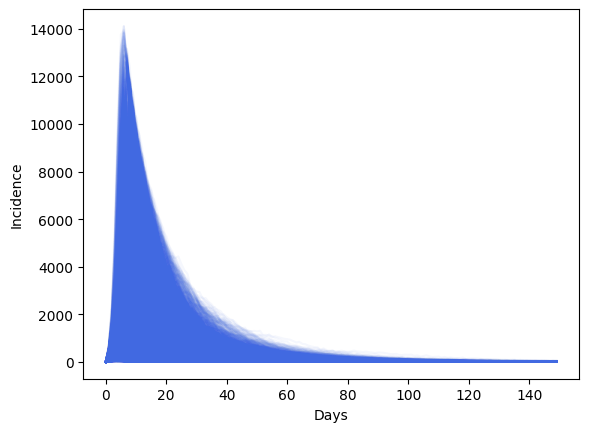

In [46]:
for i in range(len(dataset)):
    plt.plot(dataset.values[i][5:], color='RoyalBlue', alpha=0.05)

plt.xlabel('Days')
plt.ylabel('Incidence')
plt.savefig('../figures/train_curves_7200.png', dpi=600, bbox_inches='tight')

R_0 =  1.0


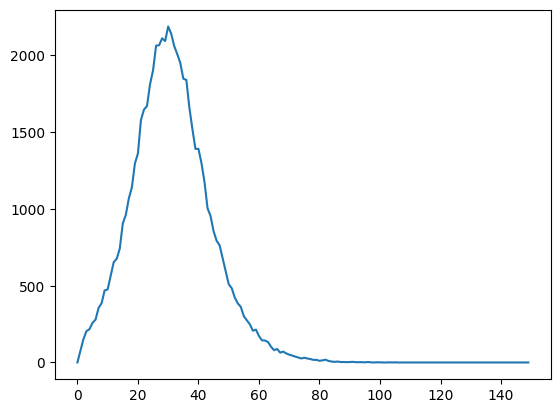

In [34]:
beta = 0.2 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected
print('R_0 = ', beta/delta)

res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=init_rec_frac)
plt.plot(res.daily_incidence)

### Dataset with intervals

In [47]:
tmax = 150 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 'init_inf_frac', 'alpha']+ \
    ['incidence_' + str(day_index) for day_index in range(tmax)] + \
    ['low_incidence_' + str(day_index) for day_index in range(tmax)] + \
    ['high_incidence_' + str(day_index) for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

In [53]:
network_model = SEIRNetworkModel(10**5)

beta = 0.5 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected

alpha_arr = np.arange(0.2, 1, 0.1) # fraction of initial non-immune array
beta_arr = np.arange(0.1, 1, 0.1) # transmission rate array

num_runs = 10

print('Dataset size:', len(alpha_arr)*len(beta_arr))

for beta in tqdm.tqdm(beta_arr):
    for alpha in alpha_arr:
        daily_incidence_arr = []
        for _ in range(num_runs):
            daily_incidence = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=(1-alpha)).daily_incidence
            daily_incidence_arr.append(daily_incidence)
        daily_incidence_arr = np.array(daily_incidence_arr)
        # print(daily_incidence_arr.shape)
        mean_daily_incidence = list(np.mean(daily_incidence_arr, axis=0))
        low_daily_incidence = list(np.min(daily_incidence_arr, axis=0))
        high_daily_incidence = list(np.max(daily_incidence_arr, axis=0))
        sample = [beta, gamma, delta, init_inf_frac, alpha] + \
            mean_daily_incidence + low_daily_incidence + high_daily_incidence
        dataset.loc[len(dataset)] = sample

Dataset size: 72


100%|██████████| 9/9 [28:18<00:00, 188.68s/it]


In [54]:
dataset.to_csv('../data/network_model_interval_dataset_72.csv')

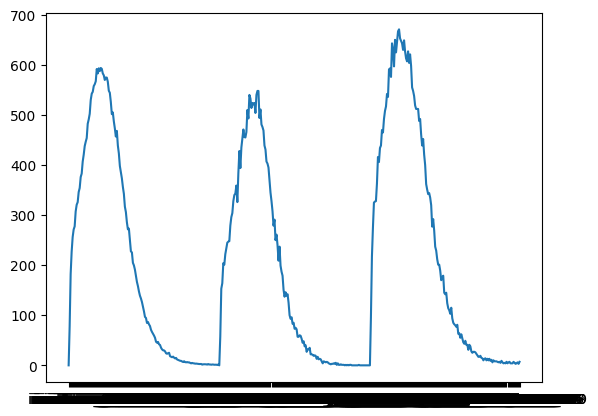

In [60]:
ts = dataset.iloc[20]
ts = ts[5:]
plt.plot(ts)